# Generating Continuous Fractions

In [19]:
import math
def continued_fraction(x,y,length_tolerance):
    output=[]
    big=max(x,y)
    small=min(x,y)
    while small>0 and len(output) < length_tolerance:
        quotient = math.floor(big/small)
        output.append(quotient)
        new_small = big%small
        big=small
        small=new_small
    return(output)


In [20]:
print(continued_fraction(105,33,10))

[3, 5, 2]


In [21]:
def get_number(continued_fraction):
    index=-1
    number=continued_fraction[index]
    while abs(index) < len(continued_fraction):
        next = continued_fraction[index-1]
        number=1/number+next
        index -=1
    return(number)

In [22]:
get_number([3,5,2])

3.1818181818181817

## Decimals to Continued Fraction

In [23]:
def continued_fraction_decimal(x, error_tolerance, length_tolerance):
    output=[]
    first_term = int(x)
    leftover=x-int(x)
    output.append(first_term)
    error=leftover
    while error > error_tolerance and len(output) < length_tolerance:
        next_term = math.floor(1/leftover)
        leftover = 1/leftover-next_term
        output.append(next_term)
        error = abs(get_number(output)-x)
    return(output)


In [24]:
print(continued_fraction_decimal(1.4142135623730951,0.00001,100))

[1, 2, 2, 2, 2, 2, 2, 2]


## Square Roots

In [25]:
def square_root(x,y,error_tolerance):
    our_error = error_tolerance*2
    while our_error > error_tolerance:
        z=x/y
        y=(y+z)/2
        our_error = y**2-x
    return y

In [26]:
print(square_root(5,1,.0000001))

2.236067977499978


In [27]:
print(math.sqrt(5))

2.23606797749979


## Linear Congruential Generators

In [28]:
def next_random(previous, n1, n2, n3):
    the_next = (previous * n1 + n2) % n3
    return(the_next)

def list_random(n1, n2, n3):
    output=[1]
    while len(output) <= n3:
        output.append(next_random(output[len(output)-1], n1,n2,n3))
    return(output)

In [31]:
#list_random(29,23,32)

In [32]:
#list_random(1,18,36)

## Diehard Tests for Randomness

In [33]:
def overlapping_sums(the_list, sum_length):
    length_of_list = len(the_list)
    the_list.extend(the_list)
    output=[]
    for n in range(0, length_of_list):
        output.append(sum(the_list[n:(n+sum_length)]))
    return output

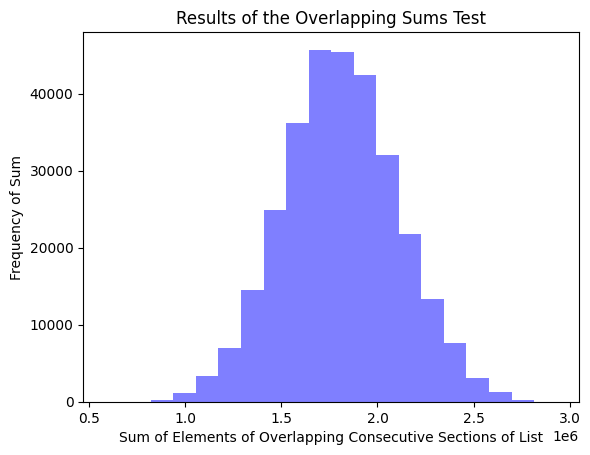

In [35]:
import matplotlib.pyplot as plt

overlap = overlapping_sums(list_random(211111,111112,300007),12)
plt.hist(overlap, 20, facecolor="blue", alpha=0.5)
plt.title("Results of the Overlapping Sums Test")
plt.xlabel("Sum of Elements of Overlapping Consecutive Sections of List")
plt.ylabel("Frequency of Sum")
plt.show()

## Linear Feedback Shift Registers

In [1]:
def feedback_shift(bits):
    xor_result = (bits[1]+bits[2]) % 2
    output = bits.pop()
    bits.insert(0, xor_result)
    return(bits,output)

def feedback_shift_list(bits_this):
    bits_output = [bits_this.copy()]
    random_output=[]
    bits_next = bits_this.copy()
    while len(bits_output) < 2 ** len(bits_this):
        bits_next,next = feedback_shift(bits_next)
        bits_output.append(bits_next.copy())
        random_output.append(next)
    return(bits_output, random_output)

In [2]:
feedback_shift_list([1,1,1])[0]

[[1, 1, 1],
 [0, 1, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]

In [41]:
feedback_shift_list([1,1,1])[1]

[1, 1, 1, 0, 0, 1, 0]